In [1]:
import tensorflow 
from tensorflow import keras 
from keras import layers

Using TensorFlow backend.


In [2]:
#load the data 
(train_data, train_labels), (test_data, test_labels) = keras.datasets.mnist.load_data()

In [3]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
train_data = train_data.reshape((train_data.shape[0], train_data.shape[1], train_data.shape[2]*1)) 
test_data = test_data.reshape((test_data.shape[0],test_data.shape[1], test_data.shape[2]*1))
train_data = train_data.astype('float32')/255
test_data = test_data.astype('float32')/255

In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define your model
model = Sequential([
    LSTM(64, input_shape=(train_data.shape[1], train_data.shape[2])),
    Dense(10, activation='softmax')
])

In [6]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.save('rnn_signature_verfication_model.h5')

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                23808     
_________________________________________________________________
dense (Dense)                (None, 10)                650       
Total params: 24,458
Trainable params: 24,458
Non-trainable params: 0
_________________________________________________________________


In [9]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

In [10]:
history=model.fit(train_data,train_labels,batch_size=128,
                  epochs=10,validation_split=0.2,callbacks=[early_stop])

Epoch 1/10


375/375 [==============================] - 65s 129ms/step - loss: 1.2614 - accuracy: 0.5745 - val_loss: 0.3910 - val_accuracy: 0.8793
Epoch 2/10
375/375 [==============================] - 35s 93ms/step - loss: 0.3340 - accuracy: 0.8975 - val_loss: 0.2219 - val_accuracy: 0.9317
Epoch 3/10
375/375 [==============================] - 39s 103ms/step - loss: 0.2033 - accuracy: 0.9395 - val_loss: 0.1733 - val_accuracy: 0.9473
Epoch 4/10
375/375 [==============================] - 25s 67ms/step - loss: 0.1551 - accuracy: 0.9550 - val_loss: 0.1275 - val_accuracy: 0.9617
Epoch 5/10
375/375 [==============================] - 23s 60ms/step - loss: 0.1255 - accuracy: 0.9618 - val_loss: 0.1097 - val_accuracy: 0.9677
Epoch 6/10
375/375 [==============================] - 22s 57ms/step - loss: 0.0986 - accuracy: 0.9692 - val_loss: 0.0966 - val_accuracy: 0.9712
Epoch 7/10
375/375 [==============================] - 23s 60ms/step - loss: 0.0866 - accuracy: 0.9726 - val_loss: 0.0961 - val_accuracy: 0.9718
E

In [11]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [12]:
import matplotlib.pyplot as plt

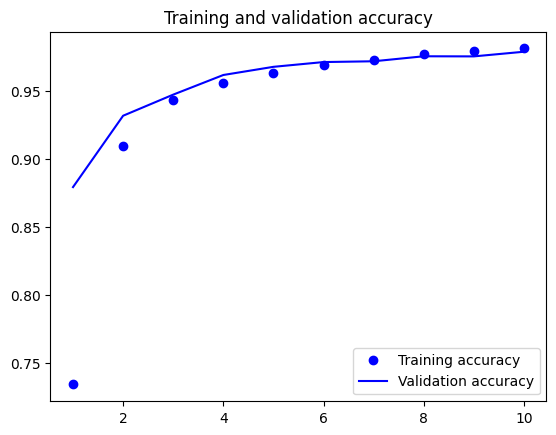

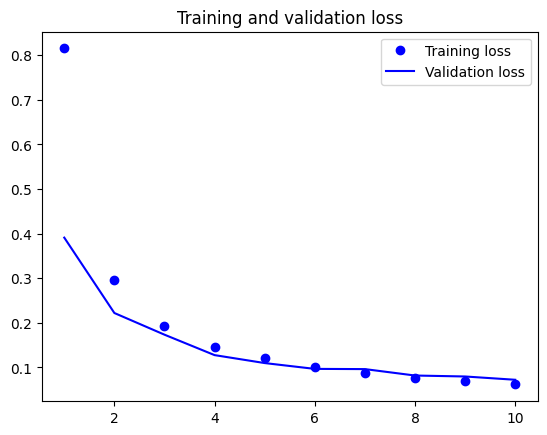

In [13]:
#plot accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy'] 
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [14]:
final_loss,final_accuracy=model.evaluate(test_data,test_labels)
print('Final loss: {:.2f}%'.format(final_loss*100))
print('Final Accuracy: {:.2f}%'.format(final_accuracy*100))

 22/313 [=>............................] - ETA: 3s - loss: 0.0822 - accuracy: 0.9773

313/313 [==============================] - 4s 13ms/step - loss: 0.0679 - accuracy: 0.9790
Final loss: 6.79%
Final Accuracy: 97.90%


In [15]:
# Save model in new format
model.save('path_to_save_model', save_format='h5')  # Or SavedModel format
